# Reddit Script

In [4]:
pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 5.0 MB/s eta 0:00:00


### imports

In [5]:
import praw
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt

### Data cleaning using Regex

In [6]:
# Data cleaning function to remove special characters, extra spaces, and convert to lowercase
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

In [7]:


# Reddit API connection
reddit = praw.Reddit(
    client_id="fyN71CJZ_AAmPHGVbNTZOw",
    client_secret="4mN-Wy73Qlj8W3yPd07z-P8c4zletg",
    user_agent="malidi_app"
)

# Subreddit for renewable energy
subreddit = reddit.subreddit('renewableenergy')

# List of Indo-Pacific countries/keywords to filter by
keywords = ['Australia', 'India', 'Singapore', 'Pacific', 'Japan', 'China', 'renewable energy']

# Collect the top 1000 posts and filter by keywords
posts = []
for post in subreddit.top(limit=1000):
    # Check if any of the keywords are in the post title or selftext
    if any(keyword.lower() in post.title.lower() or keyword.lower() in post.selftext.lower() for keyword in keywords):
        posts.append({
            'title': post.title,
            'score': post.score,
            'comments': post.num_comments,
            'url': post.url
        })

# Convert the list of posts into a Pandas DataFrame
posts_df = pd.DataFrame(posts)



# Apply the cleaning function to the 'title' column
posts_df['cleaned_title'] = posts_df['title'].apply(clean_text)

# Define a list of country names for analysis
countries = ['Singapore', 'Australia', 'India', 'China']

# Function to count occurrences of countries in the cleaned text
def count_countries(text, countries):
    country_count = Counter()
    for country in countries:
        if re.search(rf'\b{country.lower()}\b', text):
            country_count[country] += 1
    return country_count

# Apply the function to the 'cleaned_title' column of the DataFrame
country_counts = Counter()
for title in posts_df['cleaned_title']:
    country_counts.update(count_countries(title, countries))

# Convert the Counter to a DataFrame for visualization
country_counts_df = pd.DataFrame(list(country_counts.items()), columns=['Country', 'Occurrences'])




It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

### Plotting the graphs

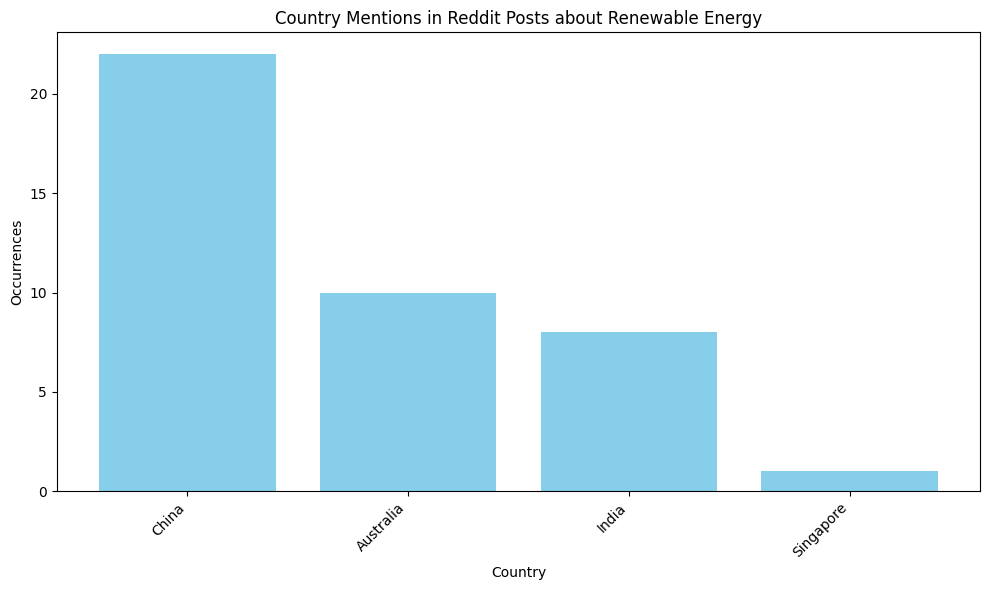

In [8]:
# Plot the country occurrences in a bar graph
plt.figure(figsize=(10, 6))
plt.bar(country_counts_df['Country'], country_counts_df['Occurrences'], color='skyblue')
plt.title('Country Mentions in Reddit Posts about Renewable Energy')
plt.xlabel('Country')
plt.ylabel('Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

### Plotly Code to generate HTML documents

In [9]:
import plotly.offline as pyo
import plotly.graph_objs as go

# Define a list of colors for each bar
colors = ['#37b99c', '#37b99c', '#37b99c', '#37b99c', '#37b99c']  # Example colors

# Create data for the bar chart with different colors for each bar
data = [go.Bar(
    x=list(country_counts_df['Country']),  # Energy types as x-axis labels
    y=list(country_counts_df['Occurrences']),  # Count of occurrences as y-axis values
    marker=dict(color=colors)  # Assign different colors to each bar
)]

# Layout for the chart
layout = go.Layout(
    title='Country Mentions in Reddit Posts about Renewable Energy',
    xaxis=dict(title='Country'),
    yaxis=dict(title='Occurrences')
)

# Create a figure with the data and layout
fig = go.Figure(data=data, layout=layout)

# Export the chart as an HTML file
pyo.plot(fig, filename='energy_sources_chart2.html')

'energy_sources_chart2.html'